# Steelers Analytics 2016
This is my final project for my Data Visualization class. For this project we were tasked with the following: 
1.) Select a dataset of our choosing 
2.) Chop the dataset using pandas 
3.) Clean the dataset and drop missing values if needed 
4.) Create two types of visualization minimum 
5.) Create an excellent readme file 
6.) Push to Github and Kaggle

## About the Dataset
For this project I have chosen to use a dataset that includes detailed NFL Play-by-Play from 2009-2016.  The dataset contains all regular season plays from the 2009-2016 NFL seasons.  The dataset has 356,768 rows and 100 columns.

## Importing the Data

In [1]:
# First we must import the necessary modules for data manipulation and visual representation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
# Now that we have all the modules loaded in we can now read the analytics csv
# file and store our dataset into a dataframe called "NFL"
NFL=pd.read_csv("NFL by Play 2009-2016 (v2).csv",low_memory=False)
NFL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362447 entries, 0 to 362446
Data columns (total 100 columns):
Date                           362447 non-null object
GameID                         362447 non-null int64
Drive                          362447 non-null int64
qtr                            362447 non-null int64
down                           308229 non-null float64
time                           362259 non-null object
TimeUnder                      362447 non-null int64
TimeSecs                       362259 non-null float64
PlayTimeDiff                   362073 non-null float64
SideofField                    361997 non-null object
yrdln                          361724 non-null float64
yrdline100                     361724 non-null float64
ydstogo                        362447 non-null int64
ydsnet                         362447 non-null int64
GoalToGo                       361724 non-null float64
FirstDown                      336850 non-null float64
posteam                

## Cleaning the Data
This is a very clean dataset but with any dataset we should always check to make sure.

In [3]:
NFL.isnull().any()

Date                           False
GameID                         False
Drive                          False
qtr                            False
down                            True
time                            True
TimeUnder                      False
TimeSecs                        True
PlayTimeDiff                    True
SideofField                     True
yrdln                           True
yrdline100                      True
ydstogo                        False
ydsnet                         False
GoalToGo                        True
FirstDown                       True
posteam                         True
DefensiveTeam                   True
desc                            True
PlayAttempted                  False
Yards.Gained                   False
sp                             False
Touchdown                      False
ExPointResult                   True
TwoPointConv                    True
DefTwoPoint                     True
Safety                         False
O

In [4]:
# We are missing some data but we will scrub what exactly we want
# So let's first take a look at what we are working with
NFL.head()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
0,2009-09-10,2009091000,1,1,NaN,15:00,15,3600.0,0.0,TEN,...,2.060949,NaN,NaN,0.485416,0.514584,0.547820,0.452180,0.485416,0.062403,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,0.128315,-1.108117,1.236432,0.547820,0.452180,0.553604,0.446396,0.547820,0.005784,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,-1.345917,NaN,NaN,0.553604,0.446396,0.514804,0.485196,0.553604,-0.038800,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,-1.804419,3.304394,-5.108813,0.514804,0.485196,0.461075,0.538925,0.514804,-0.053729,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,2.264203,NaN,NaN,0.461075,0.538925,0.560977,0.439023,0.461075,0.099902,2009


In [13]:
# So far this dataset contains a lot of data. Let's trim it down to
# the Steelers stats from last season which is 2016
Steelers = NFL[((NFL["HomeTeam"] == 'PIT') | (NFL["AwayTeam"] == 'PIT')) 
             & (NFL["Season"] == 2016) & (NFL['Touchdown'] == 1)]
grouped = Steelers.groupby(by='Date')
len(grouped)

16

In [23]:
# Now that we have all the Steelers data let's look at all the offensive plays
offense = Steelers[(Steelers["DefensiveTeam"] != 'PIT')]

# We are going to sort it by yards gained including the top 100 plays
Top_Plays = offense.sort_values(by='Yards.Gained',ascending=False)[:48]

# Now let's make sure we can see both rushers and recievers
Top_Plays['scorer'] = Top_Plays["Rusher"]
Top_Plays['scorer'].fillna(Top_Plays['Receiver'], inplace = True)

# Let's look at what we have
Touchdowns = Top_Plays[['PlayType',
          'down',
          'Yards.Gained',
          'Date',
          'qtr',
          'desc',
          'scorer',
          'Rusher',
          'Receiver']]
Touchdowns.head()

,PlayType,down,Yards.Gained,Date,qtr,desc,scorer,Rusher,Receiver
329328,Pass,3.0,72,2016-10-09,1,(10:25) (Shotgun) B.Roethlisberger pass deep r...,S.Coates,NaN,S.Coates
332020,Run,1.0,60,2016-10-16,1,"(5:52) D.Heyward-Bey left end for 60 yards, TO...",D.Heyward-Bey,D.Heyward-Bey,NaN
327736,Pass,2.0,38,2016-10-02,1,(1:28) B.Roethlisberger pass deep middle to A....,A.Brown,NaN,A.Brown
346084,Pass,2.0,33,2016-11-24,2,(9:08) (Pass formation) B.Roethlisberger pass ...,A.Brown,NaN,A.Brown
327717,Pass,3.0,31,2016-10-02,1,(7:34) (Shotgun) B.Roethlisberger pass deep le...,D.Heyward-Bey,NaN,D.Heyward-Bey


## The Data (What We Are Working With)

In [24]:
# Currently, each row indicates a play. Each play also represents a
# touchdown scored. As we can see we have a total of 48 touchdowns scored
# and 9 features that we can observe
Touchdowns.shape

(48, 9)

In [25]:
# Let's look at our datatypes
Touchdowns.dtypes

PlayType         object
down            float64
Yards.Gained      int64
Date             object
qtr               int64
desc             object
scorer           object
Rusher           object
Receiver         object
dtype: object

In [27]:
# To better describe the data we can use the describe function
Touchdowns.describe()

,down,Yards.Gained,qtr
count,48.000000,48.000000,48.000000
mean,2.145833,15.041667,2.729167
std,0.922291,14.996394,1.283936
min,1.000000,0.000000,1.000000
25%,1.000000,4.000000,1.750000
50%,2.000000,10.000000,3.000000
75%,3.000000,23.000000,4.000000
max,4.000000,72.000000,5.000000


In [34]:
# Let's also take a look at each player who scored
Player = Touchdowns.groupby('scorer')
Player.mean()

,down,Yards.Gained,qtr
scorer,,,
A.Brown,2.416667,20.500000,2.666667
B.Roethlisberger,1.000000,4.000000,4.000000
C.Hamilton,1.500000,24.500000,4.500000
D.Ayers,3.000000,11.000000,4.000000
D.Heyward-Bey,2.333333,35.000000,1.333333
D.Williams,1.833333,6.500000,3.666667
E.Rogers,2.000000,10.000000,2.333333
J.James,1.666667,6.333333,2.333333
L.Bell,1.777778,4.222222,2.444444


## General Data Visualization

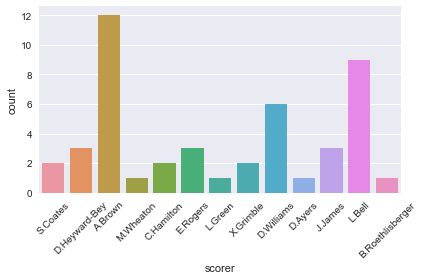

In [39]:
# Let's see who has the most touchdowns out of all 48
x = sns.countplot(Top_Plays['scorer'])
plt.setp(x.get_xticklabels(), rotation=45)
plt.tight_layout()
plt.show()

As we can see our two leading scorers were Antonio Brown and Levion Bell.
* 4 players were tied for fewest touchdowns scored at 1
* Antonio Brown had the most touchdowns scored at 12.

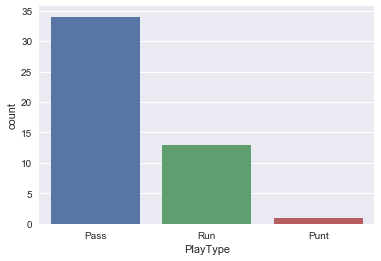

In [42]:
# Let's look at the play breakdown with a bar plot
sns.countplot(x="PlayType", data=Top_Plays)

When looking at the information above, We get three playtypes because one was a punt return for a touchdown.  We can also see the Steelers scored more on pass plays than they did on the run.

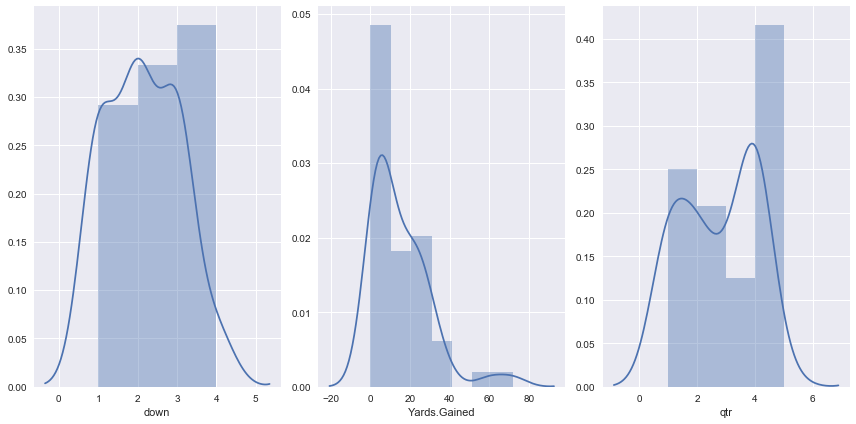

In [43]:
# Next we will look at a scoring distribution from down, 
# yards gained, and quarter.
fig, axs = plt.subplots(ncols = 3, figsize=(12,6))
sns.distplot(Top_Plays["down"], ax=axs[0])
sns.distplot(Top_Plays["Yards.Gained"], ax=axs[1])
sns.distplot(Top_Plays["qtr"], ax=axs[2])
plt.tight_layout()
plt.show()

As we can from the distribution plot above:
* The average down scored on was 2nd down.
* The average yards gained during a scoring play was around 5 yards.
* The average quarter scored in was the 4th quarter.

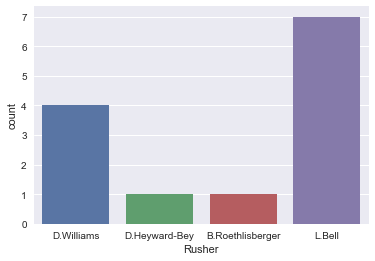

In [50]:
#So who scored the most between Receivers and Rushers?
# First let's look at rushers:
runs = offense[(offense["PlayType"] == 'Run')]
sns.countplot(x="Rusher",data=runs)

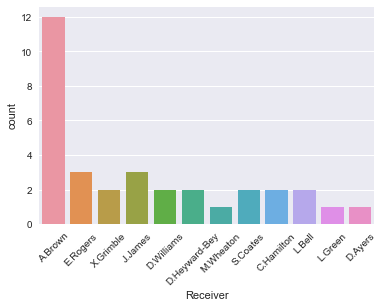

In [52]:
# Next we will look at Receivers:
passes = offense[(offense["PlayType"] == 'Pass')]
x = sns.countplot(x="Receiver",data=passes)
plt.setp(x.get_xticklabels(), rotation=45)
plt.show()

## Summary
Based on the data interpreted in this dataset, we can conclude the following:
* The Steelers had a total of 48 touchdowns scored in 2016
    * Of the 48 only 13 players on the team scored
    * 34 were passing touchdowns
    * 13 were rushing touchdowns
    * 1 was a punt return for a touchdown
* Levion Bell lead the team in rushing touchdowns
    * 7 Total
* Antonio Brown lead the team with receiving touchdowns and most toucdowns scored
    * 12 Total